# Actividad - Regresión Lineal

* **Nombre:** Diego Alfonso Ramírez Montes
* **Matrícula:** A01707596

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio. <br>
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite. <br>
**Importante**:
  * Colocar nombres de ejes en gráficas.
  * Títulos en las gráficas.
  * Contestar cada pregunta.

Carga el conjunto de datos `presion.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [5]:
# Carga las librerías necesarias.
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [2]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.
from google.colab import files
uploaded = files.upload()

Saving presion.csv to presion.csv


In [6]:
df = pd.read_csv('presion.csv')
df.head(6)

,Age,Average of ap_hi,Average of ap_lo
0,30,112.500000,72.500000
1,39,119.029340,88.229829
2,40,119.789630,85.858889
3,41,121.490862,90.344648
4,42,120.163872,89.887957
5,43,141.294203,93.388406


El conjunto de datos contiene información demográfica sobre los asegurados en una compañía de seguros:
* **Age**: Edad de la persona.
* **Average of ap_hi**: Promedio de presión alta.
* **Average of ap_lo**: Promedio de presión baja.

<Axes: xlabel='Age'>

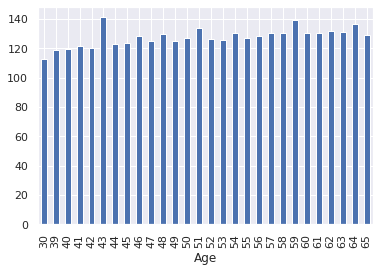

In [14]:
# Grafica la información de la edad y presión alta
fig = plt.figure(figsize=(6,4))
df.set_index('Age')['Average of ap_hi'].plot(kind='bar')

<Axes: xlabel='Age'>

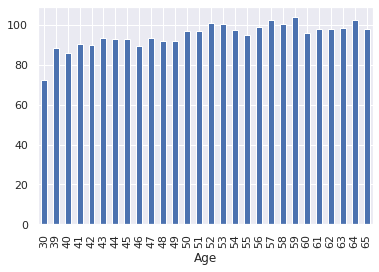

In [15]:
# Grafica la información de la edad y presión alta <- (Baja ?)
fig = plt.figure(figsize=(6,4))
df.set_index('Age')['Average of ap_lo'].plot(kind='bar')

Genera una regresión líneal para obtener una aproximación de la ecuación 
$$ y = ax + b $$
donde $ a $ se conoce comúnmente como **pendiente**, y $ b $ se conoce comúnmente como **intersección**, tanto para presión alta como la presión baja.

In [37]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión alta?
from sklearn.linear_model import LinearRegression

x = df[['Age']]
y = df[['Average of ap_hi']]
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     [0.47769703]
Model intercept: [103.3969741]


In [38]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión baja?
x = df[['Age']]
y = df[['Average of ap_lo']]
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)


print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     [0.60898106]
Model intercept: [63.72620041]


Gráfica los datos reales contra los obtenidos con el modelo. Se debe visualizar los datos reales (azúl), recta del modelo (negro)y distancias entre ambos. (verde) 

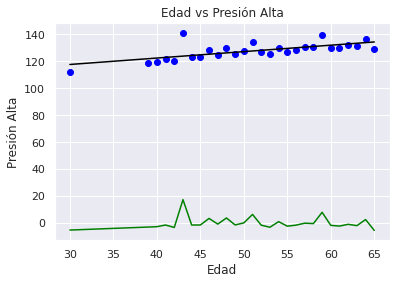

In [53]:
# Presión alta
x = df[['Age']]
y = df[['Average of ap_hi']]
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
plt.scatter(x, y, color = 'blue')
plt.plot(x, model.predict(x), color = 'black')
plt.plot(x, y - model.predict(x), color = 'green')
plt.title('Edad vs Presión Alta')
plt.xlabel('Edad')
plt.ylabel('Presión Alta')
plt.show()

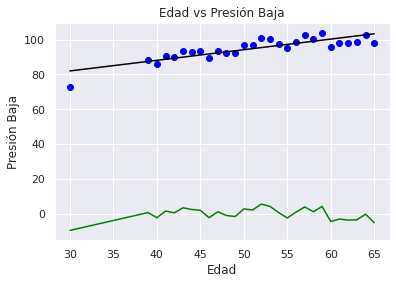

In [54]:
# Presión baja
x = df[['Age']]
y = df[['Average of ap_lo']]
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
plt.scatter(x, y, color = 'blue')
plt.plot(x, model.predict(x), color = 'black')
plt.plot(x, y - model.predict(x), color = 'green')
plt.title('Edad vs Presión Baja')
plt.xlabel('Edad')
plt.ylabel('Presión Baja')
plt.show()

In [60]:
def pressure_low(age):
  return 0.47769703 * age + 103.3969741

query_age= 76
pressure_low(query_age)

139.70194838

¿Cual es la presión arterial atal y baja para una persona de cierta edad? Genera dos funciones que calculen los anterior.

In [61]:
def pressure_high(age):
  return 0.60898106 * age + 63.72620041

query_age= 76
pressure_high(query_age)

110.00876097